#  Covid19 Data Analysis 
------------------------------------------

## In this project , we are going to analyse the relationship between the spread of Covid-19 Virus and how happy the people are in that country.

###  Importing the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


###  Importing covid19 dataset



In [5]:
corona_dataset_csv = pd.read_csv("covid19_deaths_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Checking the shape of the dataframe

In [8]:
corona_dataset_csv.shape

(266, 104)

###  Deleting the useless columns

In [9]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [13]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


###  Aggregating the rows by the country

In [20]:
corona_dataset_aggregated= corona_dataset_csv.groupby("Country/Region").sum()

In [24]:
corona_dataset_aggregated.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [25]:
corona_dataset_aggregated.shape

(187, 100)

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

<AxesSubplot:>

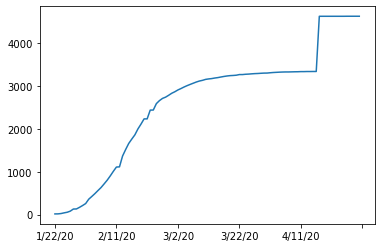

In [28]:
corona_dataset_aggregated.loc["China"].plot()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

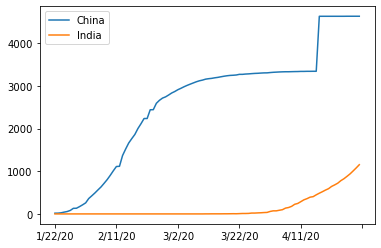

In [34]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['India'].plot()
#corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

<AxesSubplot:>

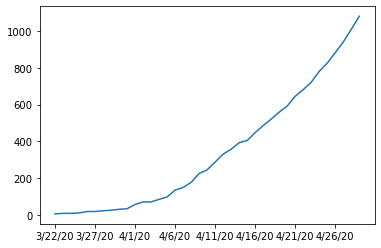

In [37]:
corona_dataset_aggregated.loc['India'][60:-1].plot()

### Caculating the first derivative of the curve

<AxesSubplot:>

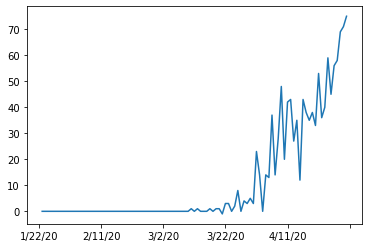

In [38]:
corona_dataset_aggregated.loc["India"].diff().plot()

### Finding the maxmimum infection rate for India

In [39]:
corona_dataset_aggregated.loc["India"].diff().max()

75.0

### Finding the maxmimum infection rate for China

In [40]:
corona_dataset_aggregated.loc["China"].diff().max()

1290.0

###  Finding the  maximum infection rate for all of the countries. 

In [42]:
countries=list(corona_dataset_aggregated.index)

In [43]:
max_infection_rates=[]

In [44]:
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

In [45]:
corona_dataset_aggregated["Max Infection Rate"]= max_infection_rates

In [46]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


###  Creating a new dataframe with only needed column 

In [70]:
df=corona_dataset_aggregated.iloc[:,[-1]]
df.head()

,Max Infection Rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [71]:
df

,Max Infection Rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


 
### Importing the WorldHappinessReport.csv dataset


In [88]:
happiness_report_csv=pd.read_csv("worldwide_happiness_report.csv")

In [89]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Dropping  the useless columns 

In [90]:
useless_columns= ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [91]:
happiness_report_csv.drop(useless_columns,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [92]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining two dataset we have prepared  

#### Corona Dataset :

In [96]:
df


,Max Infection Rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


####  World happiness report Dataset :

In [97]:
happiness_report_csv

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [98]:
data = df.join(happiness_report_csv,how="inner")

In [99]:
data.head()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


###  Correlation matrix 

In [100]:
data.corr()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Infection Rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


###  Visualization of the results


In [101]:
data.head()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


###  Plotting GDP vs maximum Infection rate

C:\Users\smart\anaconda3\envs\G7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

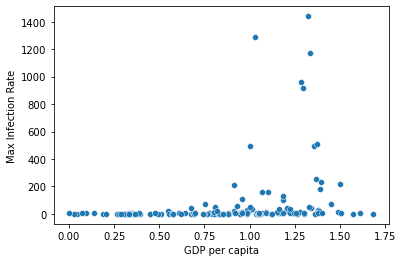

In [102]:
x=data["GDP per capita"]
y=data["Max Infection Rate"]
sns.scatterplot(x,y)

C:\Users\smart\anaconda3\envs\G7\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\smart\anaconda3\envs\G7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

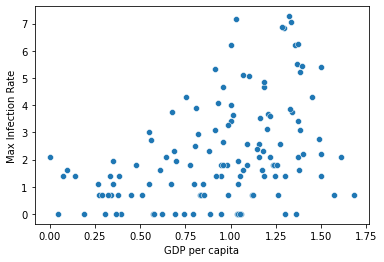

In [104]:
sns.scatterplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

C:\Users\smart\anaconda3\envs\G7\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\smart\anaconda3\envs\G7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='Max Infection Rate'>

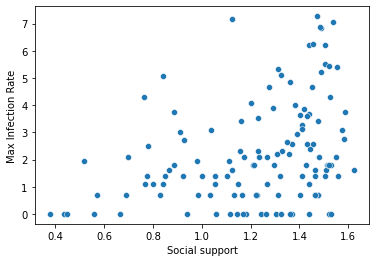

In [110]:
x=data["Social support"]
y=data["Max Infection Rate"]
sns.scatterplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

C:\Users\smart\anaconda3\envs\G7\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\smart\anaconda3\envs\G7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Infection Rate'>

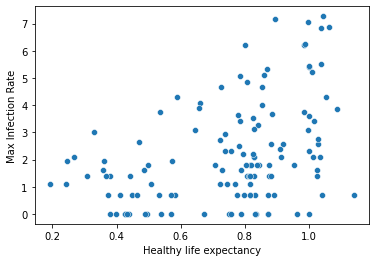

In [112]:
x=data["Healthy life expectancy"]
y=data["Max Infection Rate"]
sns.scatterplot(x,np.log(y))


### Plotting Freedom to make life choices vs maximum Infection rate

C:\Users\smart\anaconda3\envs\G7\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\smart\anaconda3\envs\G7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Infection Rate'>

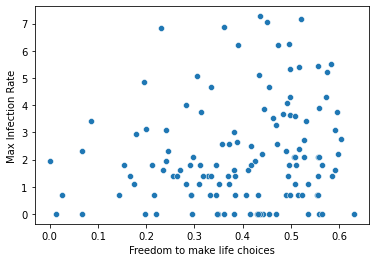

In [113]:
x=data["Freedom to make life choices"]
y=data["Max Infection Rate"]
sns.scatterplot(x,np.log(y))